In [1]:
import os
import datetime
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['axes.grid'] = False

In [3]:
def is_gzip_file(filepath):
    with open(filepath, 'rb') as f:
        return f.read(2) == b'\x1f\x8b'
def display_all(df):
    plot_cols = df.columns
    plot_features = df[plot_cols]
    plot_features.index = df.index
    _ = plot_features.plot(subplots=True)

    plot_features = df[plot_cols][:960]
    plot_features.index = df.index[:960]
    _ = plot_features.plot(subplots=True)

In [4]:
csv_path = tf.keras.utils.get_file(
    #origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/sis_selected_timeseries.csv.tar.gz')
    #origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/utci_selected_timeseries.csv.tar.gz')
    #origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/era5_hourly_data.csv.tar.gz')
    origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/era5_land_hourly.csv.tar.gz')
csv_path

'C:\\Users\\ASUS\\.keras\\datasets\\era5_land_hourly.csv.tar.gz'

In [10]:
if is_gzip_file(csv_path):
  # Read the data directly into a pandas DataFrame
  df = pd.read_csv(csv_path, compression='gzip')
else:
  # Read the data without compression
  df = pd.read_csv(csv_path)
df = df.rename(columns={df.columns[0]: 'datetime'})
row_count = df.shape[0]
print(f"Total rows: {row_count}")
df.head(5)

Total rows: 1335


,datetime,t2m,fal,slhf,ssr,str,sshf,ssrd,strd,u10,v10,sp,tp
0,2021-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01 00:00:00,292.03380,0.138192,2581.00,187396.25,-184555.00,3824.5,217395.50,1216841.2,-0.192993,-0.529051,97210.375,0.0
2,2022-01-02 00:00:00,292.26123,0.138142,953.75,200359.00,-188323.25,4528.5,232431.00,1199350.1,-0.395676,-0.205612,97189.690,0.0
3,2022-01-03 00:00:00,289.96106,0.138092,3004.50,209953.75,-221234.62,5367.5,243568.75,1120071.8,-0.183762,-0.667694,97049.560,0.0
4,2022-01-04 00:00:00,289.68115,0.138041,3045.00,206638.25,-220108.94,4915.0,239710.50,1130255.1,-0.300919,-0.704132,96974.625,0.0


In [11]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values('datetime').reset_index(drop=True)

In [12]:
# Convert 'timestamp' column to datetime
df = df.set_index('datetime')

print(df.index.year.unique())
print(df.index.year.value_counts())

Index([2021.0, 2022.0, 2023.0, 2024.0, 2025.0, nan], dtype='float64', name='datetime')
datetime
2022.0    351
2024.0    348
2023.0    348
2025.0    286
2021.0      1
Name: count, dtype: int64


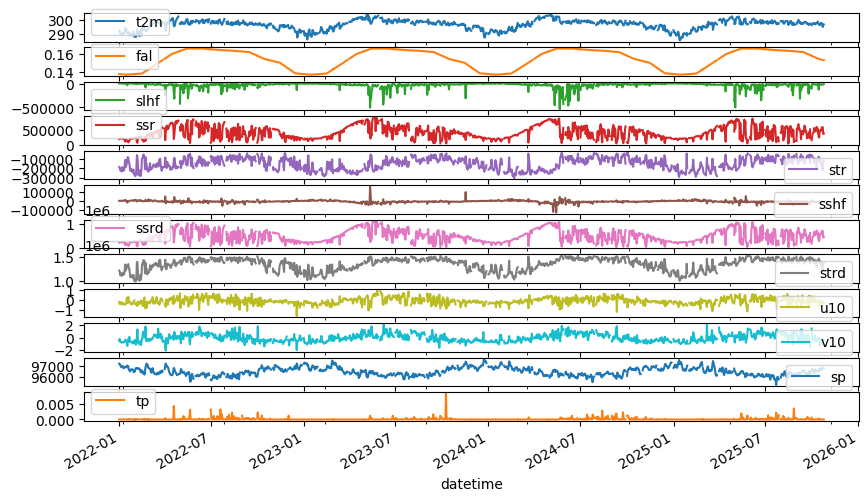

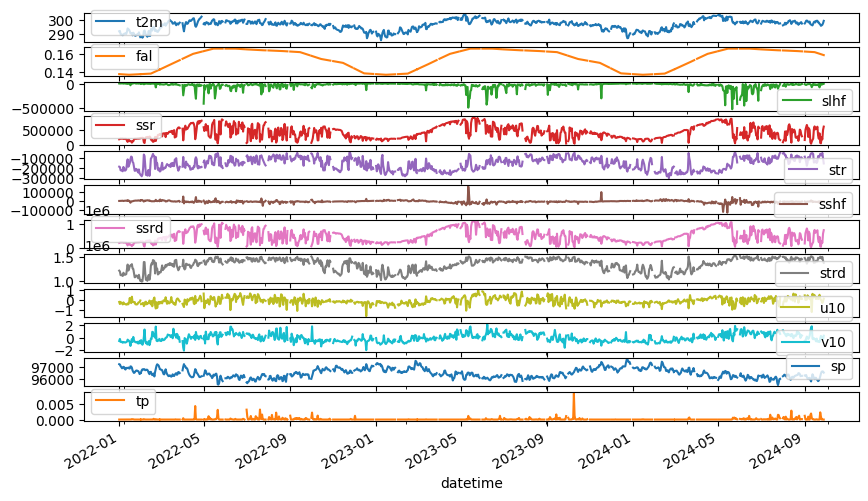

In [13]:
display_all(df)